# **Importacion de paquetes**
---

In [12]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Carga de los datos**
---

In [29]:
data=pd.read_csv('../../seleccion_vars/aparts/DatasetAirbnb_Varselect_v1.csv')


# **Eliminamos outliers**
---

In [30]:
# Calcula la media y la desviación estándar para cada columna numérica
means = data[['Evaluaciones','Precio','Capacidad']].mean()
stds = data[['Evaluaciones','Precio','Capacidad']].std()

# Elimina los outliers para cada columna numérica
for col in means.index:
    upper_bound = means[col] + 3 * stds[col]
    data = data[data[col] <= upper_bound]

# **KMEANS**
---

### **Método del codo**


Para k = 2 , el coste (SSE)= 3372206.923984797
Para k = 3 , el coste (SSE)= 1711717.0985571803
Para k = 4 , el coste (SSE)= 1125698.7682236286
Para k = 5 , el coste (SSE)= 809765.7723803156
Para k = 6 , el coste (SSE)= 668321.2541997653
Para k = 7 , el coste (SSE)= 477883.4359316807
Para k = 8 , el coste (SSE)= 410508.2430981175
Para k = 9 , el coste (SSE)= 360516.0229939908
Para k = 10 , el coste (SSE)= 299223.01579050726


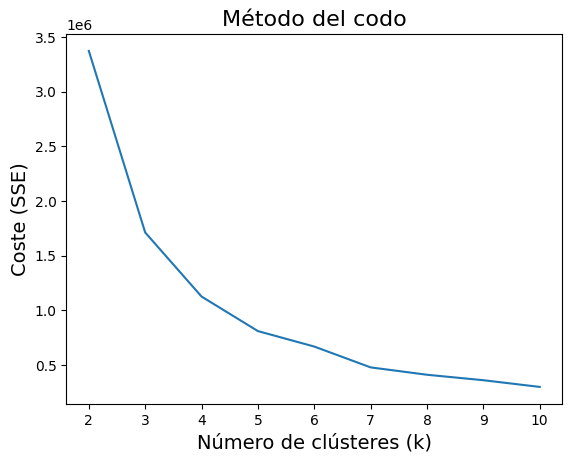

In [35]:
data_cluster=data.drop(['ID','Titulo','Descripcion Simple','URL'],axis=1)
Coste = []
krange = np.arange(2, 11) #krange = 2,3,4,5,6,7,8,9,10
# bucle para el cálculo de la función de coste (SSE) desde k= 2 hasta k= 10
for num in krange:
    kmeans = KMeans(n_clusters=num, n_init='auto', random_state=10, max_iter=100).fit(data_cluster)
    print(
        "Para k =",
        num,
        ', el coste (SSE)=',
        kmeans.inertia_,
    )
    Coste.append(kmeans.inertia_)
fig, ax = plt.subplots()
ax.set_title('Método del codo', fontsize = 16)
ax.set_ylabel("Coste (SSE)",fontsize=14)
ax.set_xlabel("Número de clústeres (k)", fontsize=14)
ax.plot(krange,Coste)
plt.show()

### **Calinski**

Para k = 2 , CH = 1157.9261058232953
Para k = 3 , CH = 1504.8058724676464
Para k = 4 , CH = 1654.0965423300645
Para k = 5 , CH = 1795.644724592741
Para k = 6 , CH = 1770.0702593455633
Para k = 7 , CH = 2109.8763186272
Para k = 8 , CH = 2120.0365955827633
Para k = 9 , CH = 2122.4567401270533
Para k = 10 , CH = 2287.0011393877253


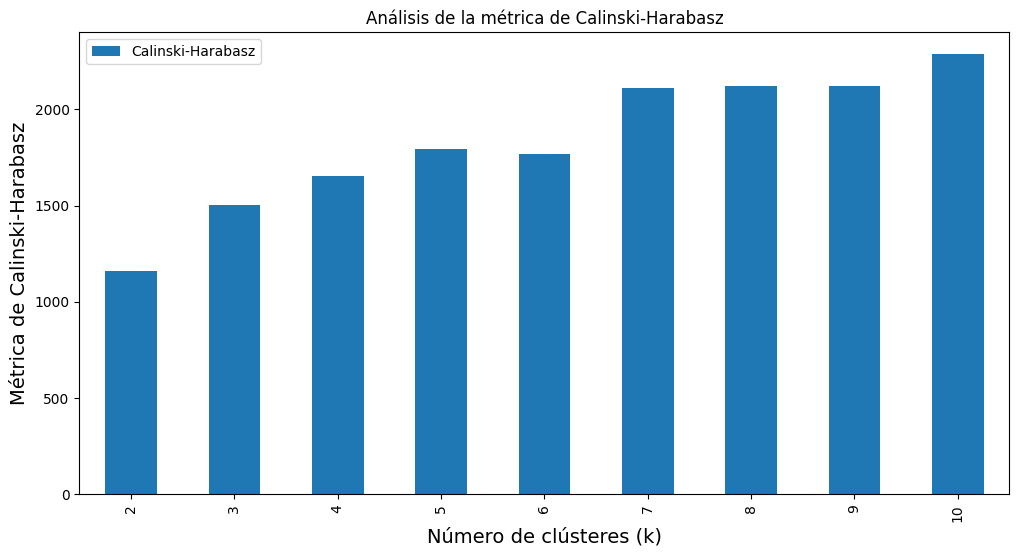

In [36]:
# definimos la n-tupla donde ordenaderemos las sucesivas métricas de Calinski-Harabasz.
# hallados para cada valor de k
Calinski = []
krange = np.arange(2, 11) #krange = 2,3,4,5,6,7,8,9,10
# bucle para la medida del error de reconstrucción desde k= 2 hasta k= 10 que se
for num in krange:
    kmeans = KMeans(n_clusters=num, n_init='auto', random_state=10, max_iter=100)
    Y_pred = kmeans.fit_predict(data_cluster)
    print(
        "Para k =",
        num,
        ', CH =',
        calinski_harabasz_score(data_cluster, Y_pred),
    )
    Calinski.append(calinski_harabasz_score(data_cluster, Y_pred))

fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharey=False)
pd.DataFrame({'n_clusters': krange,'Calinski-Harabasz': Calinski,}).set_index('n_clusters').plot(title='Análisis de la métrica de Calinski-Harabasz',
kind='bar',ax=ax)
ax.set_ylabel("Métrica de Calinski-Harabasz",fontsize=14)
ax.set_xlabel("Número de clústeres (k)", fontsize=14)
plt.show()

### **Silueta**

In [37]:
#Importamos librerías específicas para este análsis de Silhouette
#Se ha adaptado el código https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm
range_n_clusters = [ 3, 4, 5, 6, 7, 8]
silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(data_cluster)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_cluster, cluster_labels)
    print(
        "Para k =",
        n_clusters,
        ", S =",
        silhouette_avg,
    )

plt.show()

Para k = 3 , S = 0.6271798733066345
Para k = 4 , S = 0.5651237228003367
Para k = 5 , S = 0.5418511626869067
Para k = 6 , S = 0.43892556433329044
Para k = 7 , S = 0.43992351558087617
Para k = 8 , S = 0.43583597371323096


### **Clustering k=3 (Mejor según silueta)**

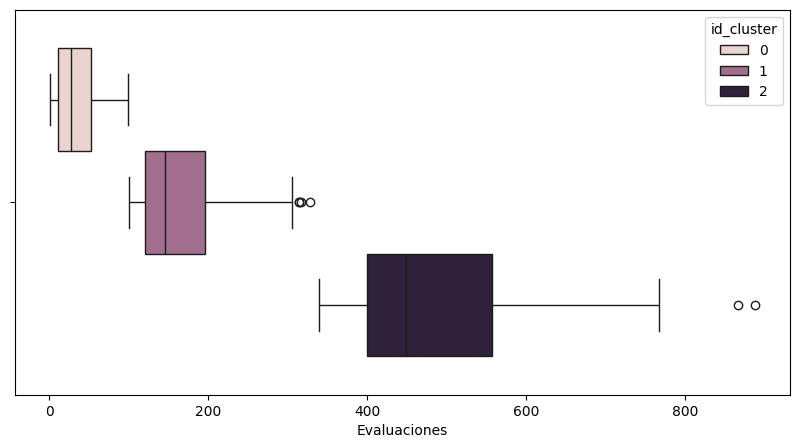

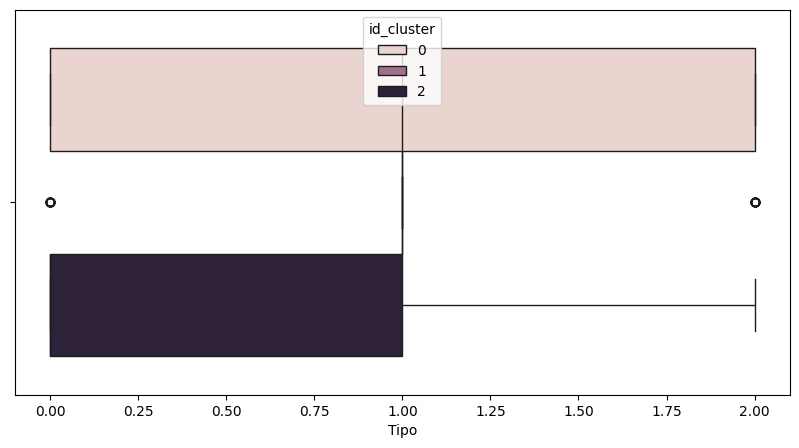

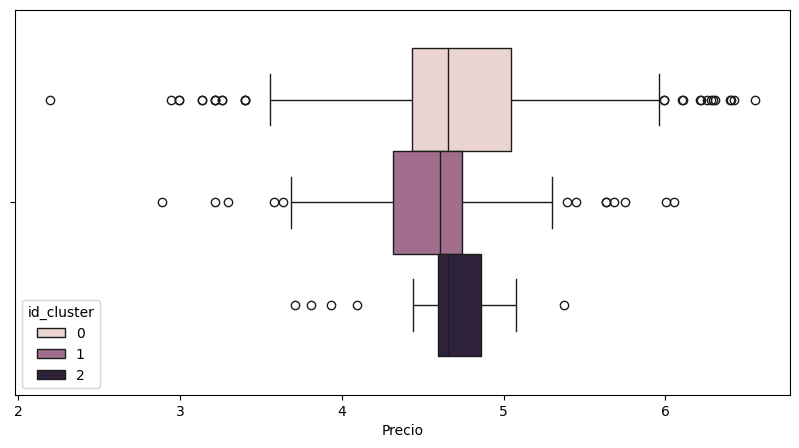

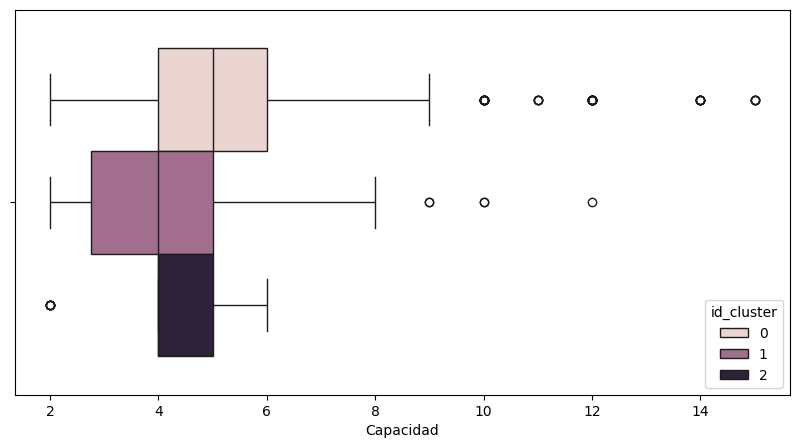

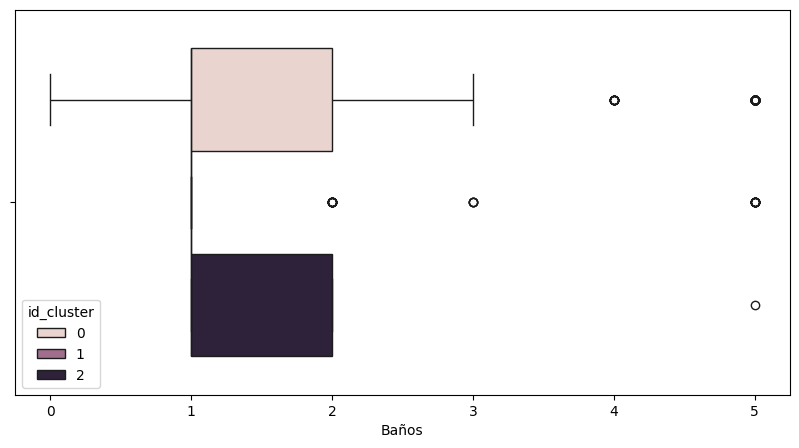

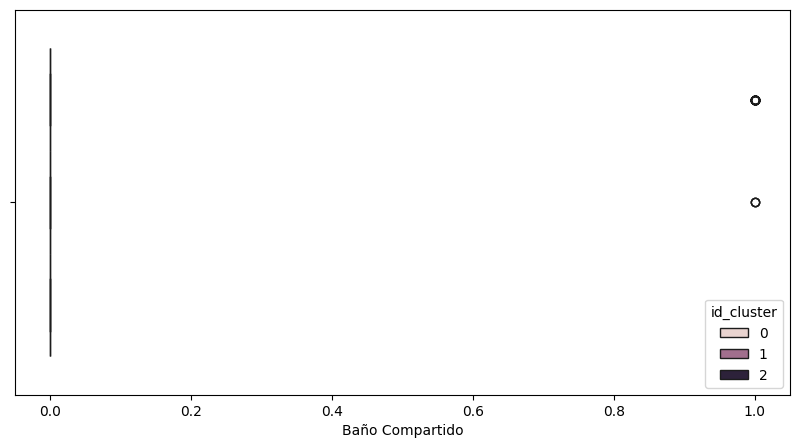

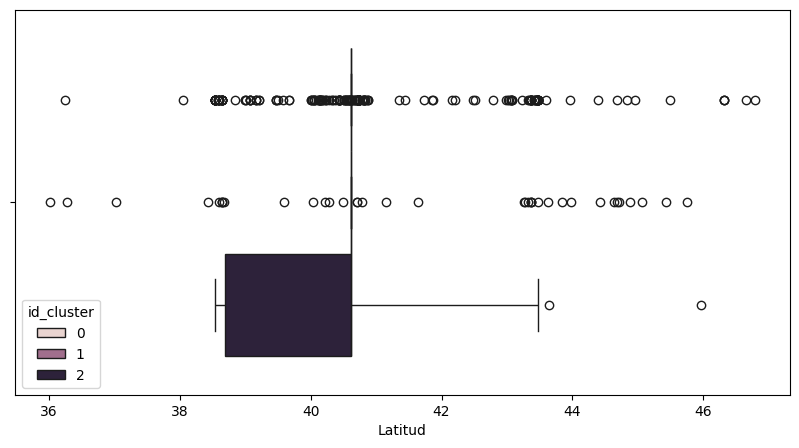

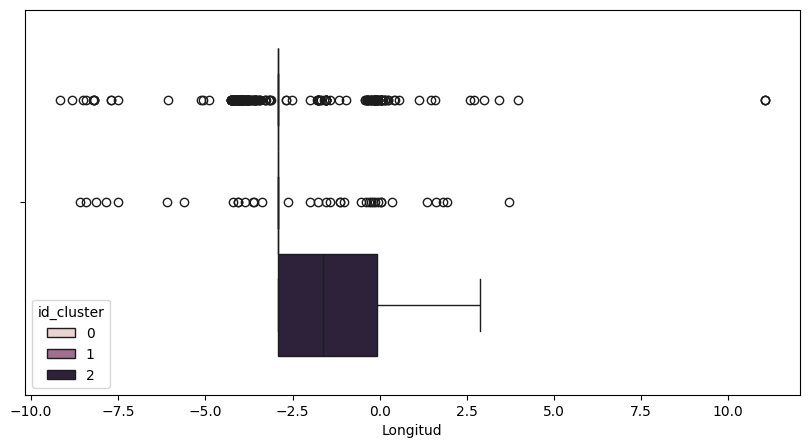

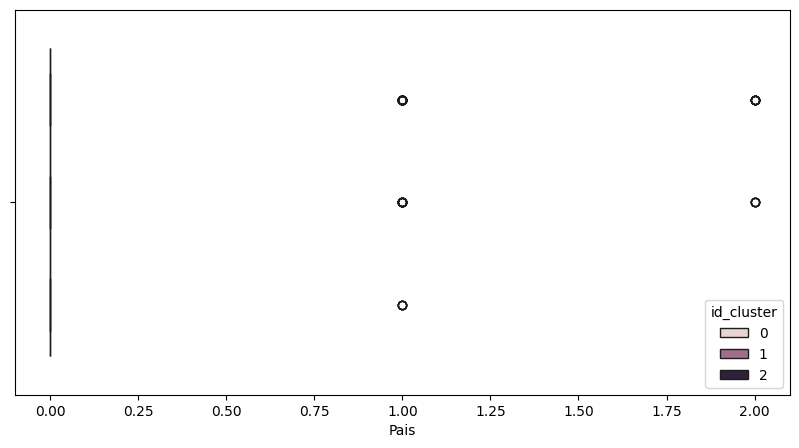

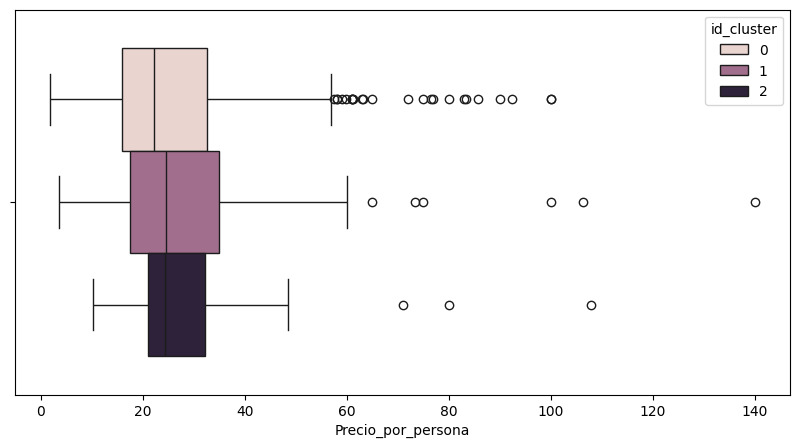

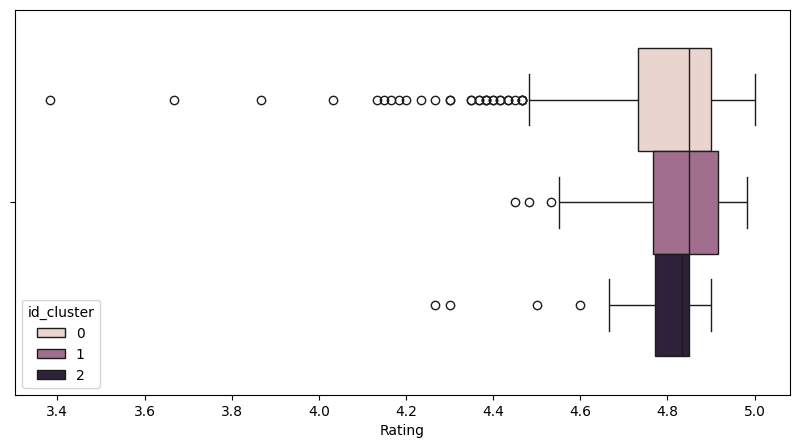

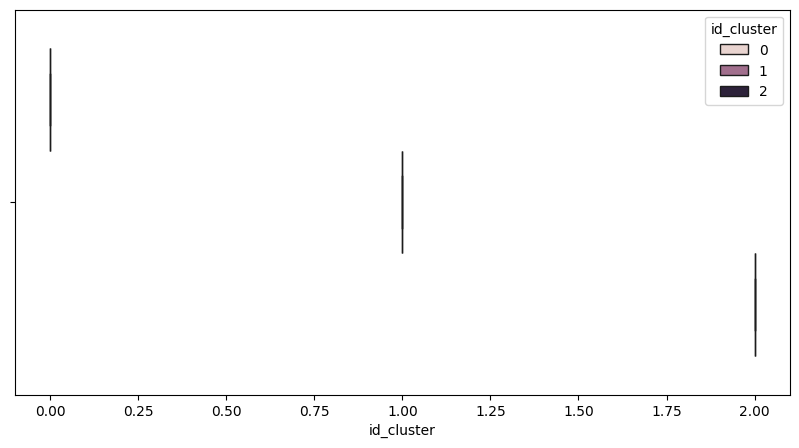

<Axes: xlabel='id_cluster', ylabel='count'>

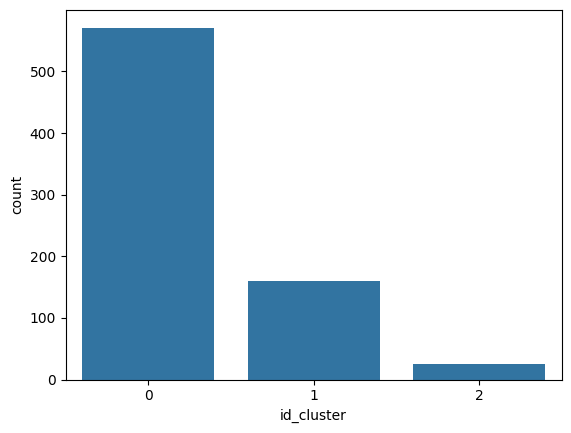

In [38]:
k_val=3
kmeans = KMeans(n_clusters=k_val, n_init= 'auto', random_state=10, max_iter=3000)
Y_pred=kmeans.fit_predict(data_cluster) # Vector de asignación de etiquetas predichas para cada elemento
data_cluster['id_cluster']=kmeans.labels_
#Boxplot con el comportamiento de los clusters para cada variable (Facilitar la caracterización)
for col in data_cluster.columns:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.boxplot(data_cluster,x=col,hue='id_cluster',ax=ax)
    plt.show()
sns.barplot(data_cluster['id_cluster'].value_counts())

### **Clustering k=10 (Mejor según calinski)**

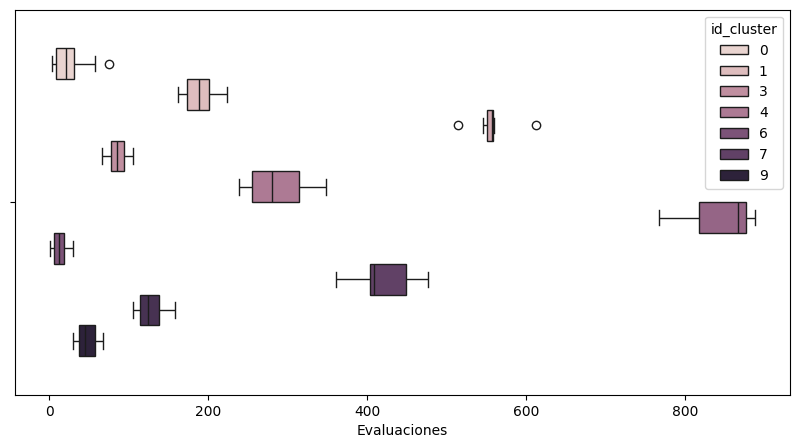

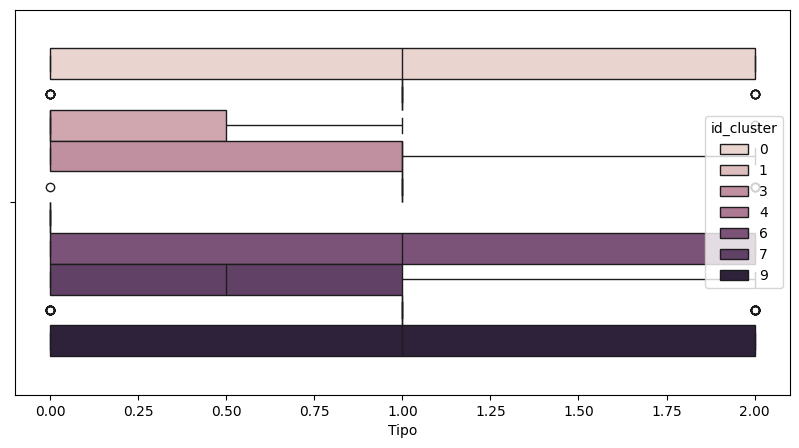

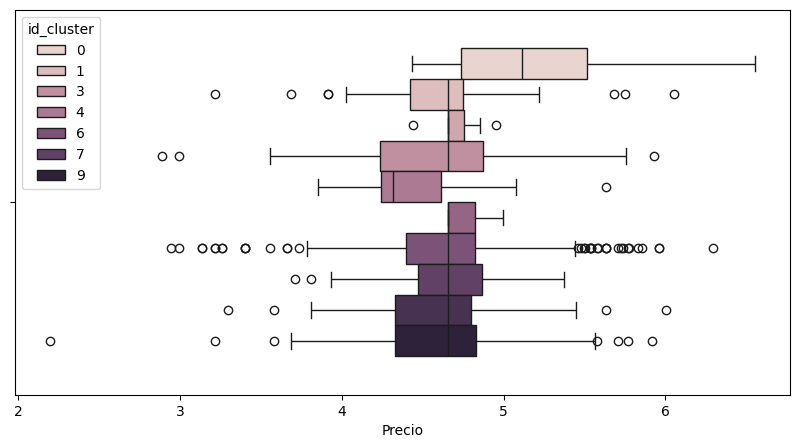

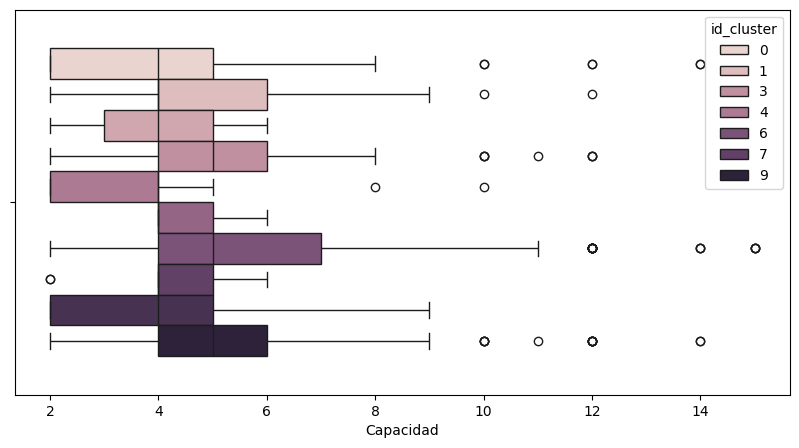

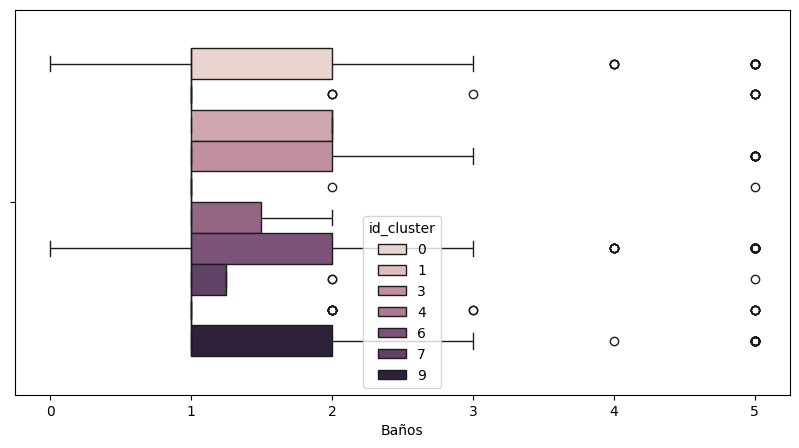

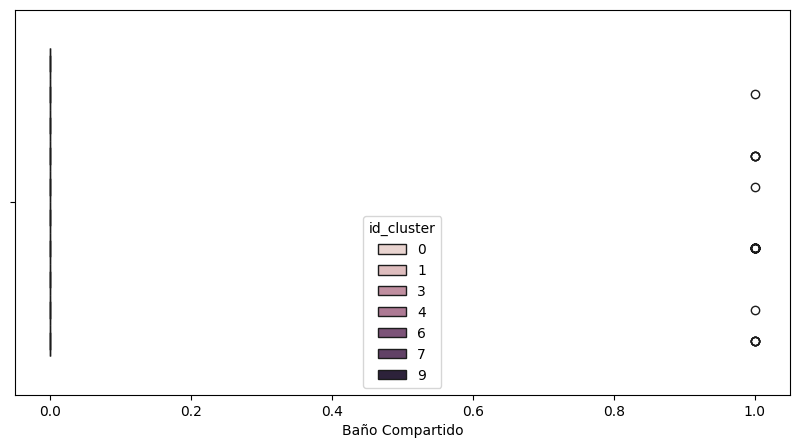

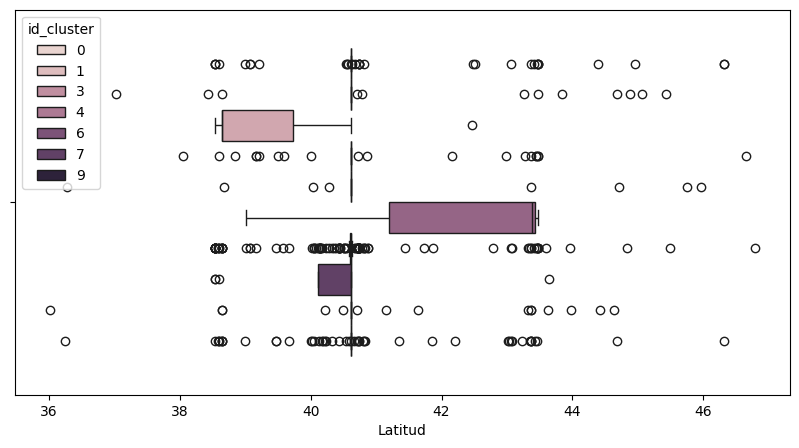

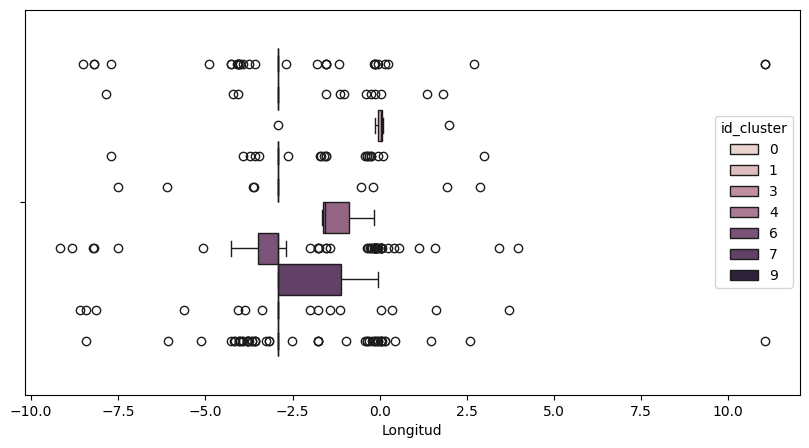

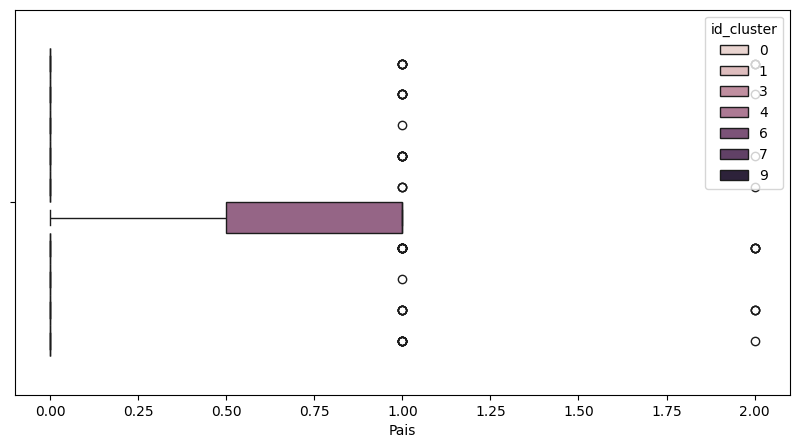

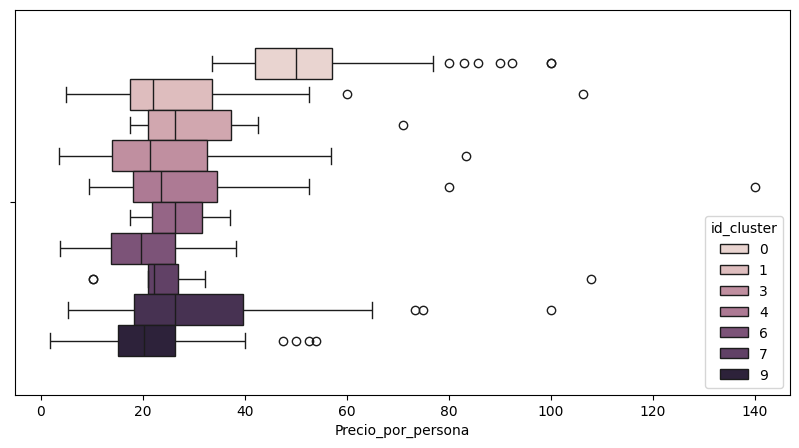

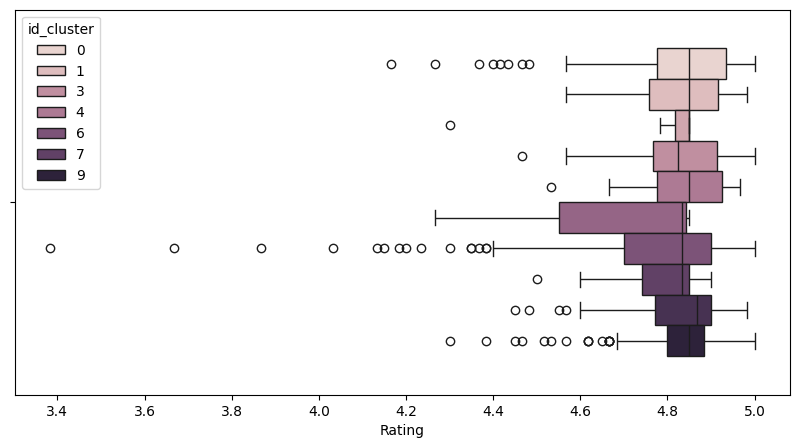

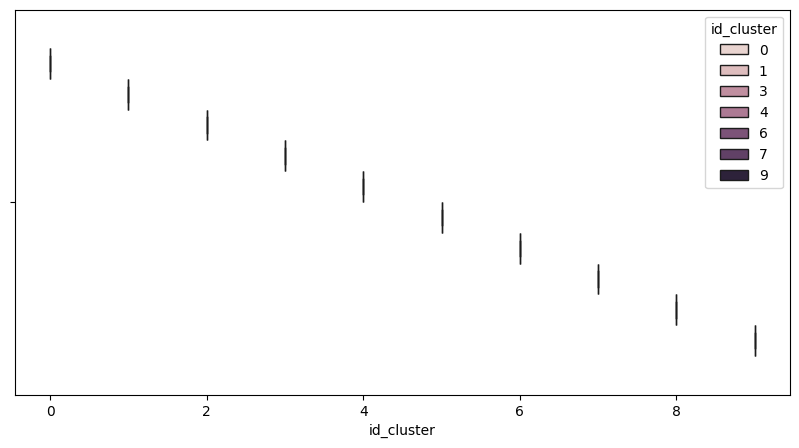

<Axes: xlabel='id_cluster', ylabel='count'>

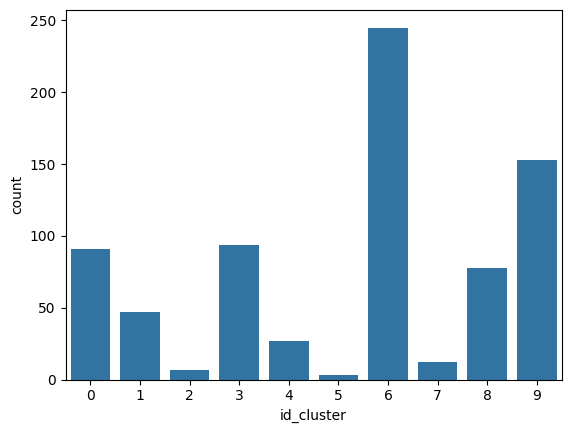

In [39]:
k_val=10
kmeans = KMeans(n_clusters=k_val, n_init= 'auto', random_state=10, max_iter=3000)
Y_pred=kmeans.fit_predict(data_cluster) # Vector de asignación de etiquetas predichas para cada elemento
data_cluster['id_cluster']=kmeans.labels_
#Boxplot con el comportamiento de los clusters para cada variable (Facilitar la caracterización)
for col in data_cluster.columns:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.boxplot(data_cluster,x=col,hue='id_cluster',ax=ax)
    plt.show()
sns.barplot(data_cluster['id_cluster'].value_counts())

# **DBSCAN**
---

In [52]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=.5, min_samples=5).fit(data_cluster)
labels = db.labels_

# Número de clusters en las etiquetas, ignorando el ruido si está presente.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Número de clusters estimados: {n_clusters_}')
print(f'Número de puntos de ruido: {n_noise_}')

Número de clusters estimados: 0
Número de puntos de ruido: 757


# **Clustering Jerárquico**
---

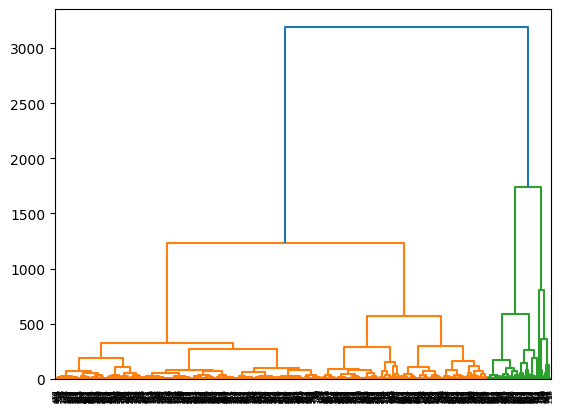

In [53]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

def hierarchical_clustering(X, num_clusters):
    Z = linkage(X, method='ward')
    clusters = fcluster(Z, t=num_clusters, criterion='maxclust')
    return clusters
data_cluster.drop('id_cluster',axis=1,inplace=True)
num_clusters = 3
clusters = hierarchical_clustering(data_cluster, num_clusters=num_clusters)

# Visualización del dendrograma
plt.figure()
dendrogram(linkage(data_cluster, method='ward'))
plt.show()

# **PCA**
---

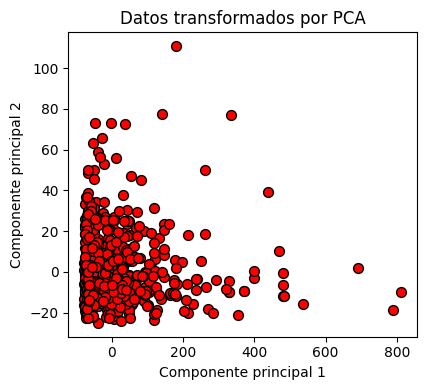

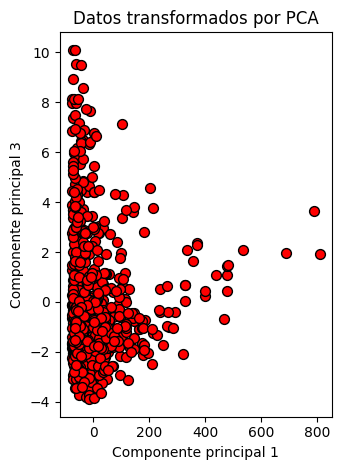

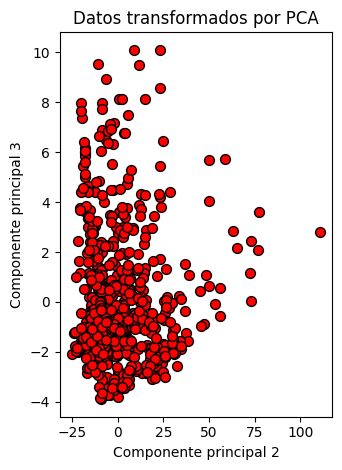

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data_cluster)

# Visualización de los datos originales y los datos transformados
plt.figure(figsize=(8, 4))

# Datos transformados por PCA
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='red', edgecolor='k', s=50)

#PC1-PC2
plt.title("Datos transformados por PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.tight_layout()
plt.show()

#PC1-PC3
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 2], c='red', edgecolor='k', s=50)
plt.title("Datos transformados por PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 3")
plt.tight_layout()
plt.show()

#PC3-PC2
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 1], X_pca[:, 2], c='red', edgecolor='k', s=50)
plt.title("Datos transformados por PCA")
plt.xlabel("Componente principal 2")
plt.ylabel("Componente principal 3")

plt.tight_layout()
plt.show()

Vemos que el pca tampoco es capaz de hacer una distincion muy clara.